<h1>Table of content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading-and-pre-processing" data-toc-modified-id="Data-loading-and-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading and pre-processing</a></span></li><li><span><a href="#Prioritization-of-hypotheses" data-toc-modified-id="Prioritization-of-hypotheses-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prioritization of hypotheses</a></span><ul class="toc-item"><li><span><a href="#Using-the-ICE-framework" data-toc-modified-id="Using-the-ICE-framework-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using the ICE framework</a></span></li><li><span><a href="#Using-the-RICE-framework" data-toc-modified-id="Using-the-RICE-framework-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using the RICE framework</a></span></li></ul></li><li><span><a href="#A/B-test-analysis" data-toc-modified-id="A/B-test-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A/B-test analysis</a></span><ul class="toc-item"><li><span><a href="#Chart-of-cumulative-revenue-and-average-bill-by-groups" data-toc-modified-id="Chart-of-cumulative-revenue-and-average-bill-by-groups-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Chart of cumulative revenue and average bill by groups</a></span></li><li><span><a href="#Chart-of-the-relative-change-in-the-cumulative-average-check-of-group-B-to-group-A" data-toc-modified-id="Chart-of-the-relative-change-in-the-cumulative-average-check-of-group-B-to-group-A-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Chart of the relative change in the cumulative average check of group B to group A</a></span></li><li><span><a href="#Chart-of-the-cumulative-average-number-of-orders-per-visitor-by-group" data-toc-modified-id="Chart-of-the-cumulative-average-number-of-orders-per-visitor-by-group-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Chart of the cumulative average number of orders per visitor by group</a></span></li><li><span><a href="#Chart-of-the-relative-change-in-the-cumulative-average-number-of-orders-per-visitor-of-group-B-to-group-A" data-toc-modified-id="Chart-of-the-relative-change-in-the-cumulative-average-number-of-orders-per-visitor-of-group-B-to-group-A-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Chart of the relative change in the cumulative average number of orders per visitor of group B to group A</a></span></li><li><span><a href="#Scatter-plot-and-95th-and-99th-percentiles-of-orders-by-user" data-toc-modified-id="Scatter-plot-and-95th-and-99th-percentiles-of-orders-by-user-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Scatter plot and 95th and 99th percentiles of orders by user</a></span></li><li><span><a href="#Scatter-plot-and-95th-and-99th-order-value-percentiles" data-toc-modified-id="Scatter-plot-and-95th-and-99th-order-value-percentiles-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Scatter plot and 95th and 99th order value percentiles</a></span></li><li><span><a href="#Statistical-significance-of-differences-between-groups-on-raw-data" data-toc-modified-id="Statistical-significance-of-differences-between-groups-on-raw-data-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Statistical significance of differences between groups on raw data</a></span></li><li><span><a href="#Statistical-significance-of-differences-between-groups-according-to-cleaned-data" data-toc-modified-id="Statistical-significance-of-differences-between-groups-according-to-cleaned-data-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Statistical significance of differences between groups according to cleaned data</a></span></li></ul></li><li><span><a href="#Decision-making-and-general-conclusion" data-toc-modified-id="Decision-making-and-general-conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision making and general conclusion</a></span></li></ul></div>

# Business decision-making

Testing hypotheses to increase the revenue of an online store.

<div style="border:solid green 2px; padding: 20px">
    
**PROJECT PLAN**
    
**Our task** - prioritize hypotheses and analyze the results of the A/B test.
    
**Project implementation plan:**
    
    1. Download data and study general information. Data pre-processing.
    
    2. Prioritization of hypotheses:
        
        - using the ICE framework;
    
        - using the RICE framework;
    
        - analysis of changes in hypothesis prioritization using RICE instead of ICE.
    
    3. A/B test analysis:
    
        - create a chart of cumulative revenue and an average bill by groups;
    
        - create a chart of the relative change in the cumulative average check of group B to group A;
    
        - create a chart of the cumulative average number of orders per visitor by group;
    
        - create a chart of the relative change in the cumulative average number of orders per visitor of group B to group A;
    
        - calculation of the 95th and 99th percentiles of the number of orders per user and creation a scatter plot;
    
        - calculation of the 95th and 99th percentiles of the cost of orders and the creation of a scatter plot;
    
        - calculation of statistical significance of differences in the average number of orders per visitor and in the average order receipt between groups according to "raw" data;
    
        - calculation of statistical significance of differences in the average number of orders per visitor and in the average check of the order between groups according to "cleaned" data;
    
    4. Decision making based on test results. General conclusion.

## Data loading and pre-processing

We will study the available data and perform pre-processing for further analysis.

In [1]:
# libraries import
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Business decision-making/hypothesis.csv'), 
        # hypothesis data
        pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Business decision-making/orders.csv'), 
        # order history in A/B test
        pd.read_csv('/Users/bulchuk/Documents/Data Analyst/Business decision-making/visitors.csv') 
        # user log in A/B test
    )
except OSError as error:
    print(error)

In [3]:
# display information about all dataframes
display(hypothesis.info())
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB



There are no gaps in the dataframes. Below we will display a table with hypotheses, as well as the first 5 lines of dataframes with data on orders and users.

The `date` columns in the `orders` and `visitors` tables will be converted to the required format.

The column names in the `hypothesis` table will be reduced to lower case.

In [4]:
# display dataframes 
display(hypothesis)
display(orders.head())
visitors.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
# let's bring the date column to the desired format
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
# change the column names of the hypothesis table to lowercase
hypothesis.columns = hypothesis.columns.str.lower()

We have 3 (three) dataframes.

Structure of `hypothesis.csv`:

* 		`hypothesis` — brief description of the hypothesis;
* 		`reach` — user coverage on a 10-point scale;
* 		`impact` — impact on users on a 10-point scale;
* 		`confidence` — confidence in the hypothesis on a 10-point scale;
* 		`efforts` — resource costs for hypothesis testing on a 10-point scale. The larger the Efforts value, the more expensive the hypothesis test.

Structure of `orders.csv`:

* 		`transactionId` — order id;
* 		`visitorId` — user id who placed an order;
* 		`date` — order date;
* 		`revenue` — order revenue;
* 		`group` — order's A/B-test group.

Structure of `visitors.csv`:

* 		`date` — date of test;
* 		`group` — group of A/B-test;
* 		`visitors` — count of users on the specified date in the specified A/B test group.


Next, we check the data for obvious duplicates and look at the unique values.

In [6]:
# check how many unique users are in the log with orders
orders['visitorId'].nunique()

1031

In [7]:
orders.duplicated().sum()

0

In [8]:
visitors.duplicated().sum()

0

In [9]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

<div style="border:solid green 2px; padding: 20px">
    
We write down all the hypotheses that we will need to test:

    1. Add two new traffic acquisition channels to attract 30% more users

    2. Launch our own delivery service which will reduce the delivery time of orders
    
    3. Add product recommendation blocks to the online store website to increase conversion and average order value

    4. Change the category structure which will increase the conversion, as users will find the right product faster

    5. Change the homepage background color to increase user engagement
    
    6. Add a customer reviews page about the store which will increase the number of orders

    7. Display banners with current promotions and sales on the main page to increase conversion

    8. Add a subscription form to all main pages to build a customer base for email newsletters

    9. Launch a birthday promotion


In [10]:
display(hypothesis['reach'].unique())
display(hypothesis['impact'].unique())
display(hypothesis['confidence'].unique())
hypothesis['efforts'].unique()

array([ 3,  2,  8,  5, 10,  1])

array([10,  5,  3,  1,  2,  7,  9])

array([8, 4, 7, 3, 1, 2, 9])

array([ 6, 10,  3,  8,  1,  5])

In [11]:
display(orders['revenue'].unique())
orders['group'].unique()

array([   1650,     730,     400,    9759,    2308,    2210,    1860,
          1044,   13710,    1855,    4008,    4499,    7370,   11985,
         10980,   15277,    1060,     990,   16490,    1190,     300,
          1050,     632,   15185,    7555,    3488,    7620,    5280,
           700,     190,     383,    1680,   22785,    2355,    2470,
          6250,   19260,     610,    2986,    1090,    9290,    2480,
          3000,    2140,    3590,    6990,    1250,    2970,   18100,
           100,    2750,     570,    2978,    1440,    7860,   56650,
           790,    1350,    2540,    1710,    2350,   14610,    8999,
         10510,   29499,     780,     890,    4400,   32350,   40740,
          2490,    2080,    5400,    5100,    4020,     690,   12350,
          1290,     382,    2110,    1490,   17868,    1940,   26550,
          5970,     987,    9024,    5555,    7129,    3240,    2995,
          2550,   17600,     850,    5365,    8390,    5870,    5020,
         14489,    8

array(['B', 'A'], dtype=object)

In [12]:
display(visitors['visitors'].unique())
visitors['group'].unique()

array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531])

array(['A', 'B'], dtype=object)

In [13]:
display(orders['date'].min())
display(orders['date'].max())
display(visitors['date'].min())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [14]:
# consider the count of users in each group
visitors_per_group = orders.groupby('group')['visitorId'].nunique()
visitors_per_group

group
A    503
B    586
Name: visitorId, dtype: int64

In [15]:
# check if some users fall into both groups
double_visitors_total = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()
double_visitors_total

group    58
dtype: int64

In [16]:
# we found 58 users who fell into both testing groups. Let's create a list of these users:
double_visitors = (orders.groupby('visitorId').agg({'group' : 'nunique'})
                   .reset_index().query('group>1')['visitorId'].unique()
                  )

In [17]:
# and leave in the table only unique users that are either in group A or in group B
orders = orders.query('visitorId not in @double_visitors')

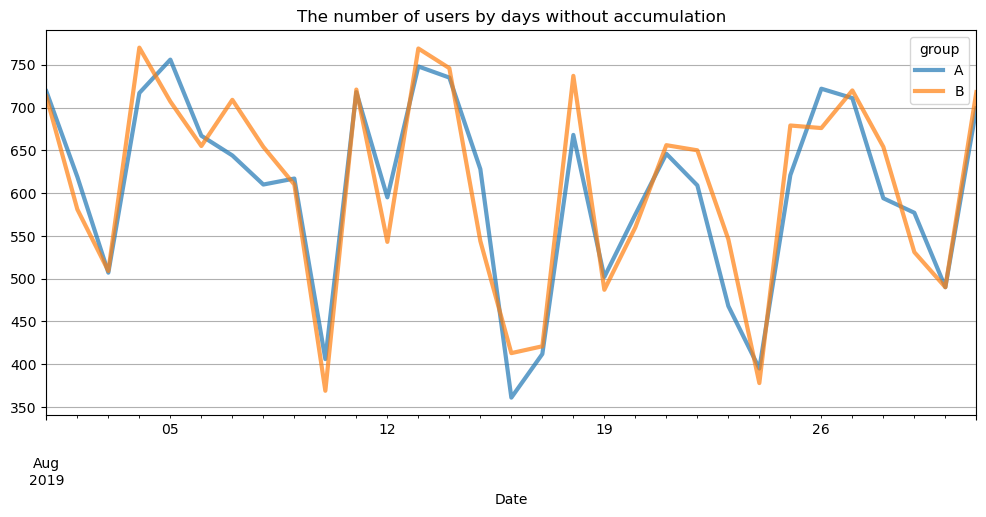

In [18]:
(
    visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='sum')
    .plot(grid=True, figsize=(12, 5), kind='line', title='The number of users by days without accumulation', 
          linewidth=3, alpha=0.7)
)
plt.xlabel('Date')
plt.show()

In [19]:
# create an array of unique pairs of date values and test groups
datesGroups = orders[['date','group']].drop_duplicates()

# aggregate data by the number of users per day by groups
visitorsAggregated = (datesGroups
                     .apply(lambda x:
                           visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]\
                           .agg({'date': 'max',
                                'group': 'max',
                                'visitors':'sum'}),
                           axis=1)
                     .sort_values(by=['date', 'group'])
                     )
visitorsAggregated.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


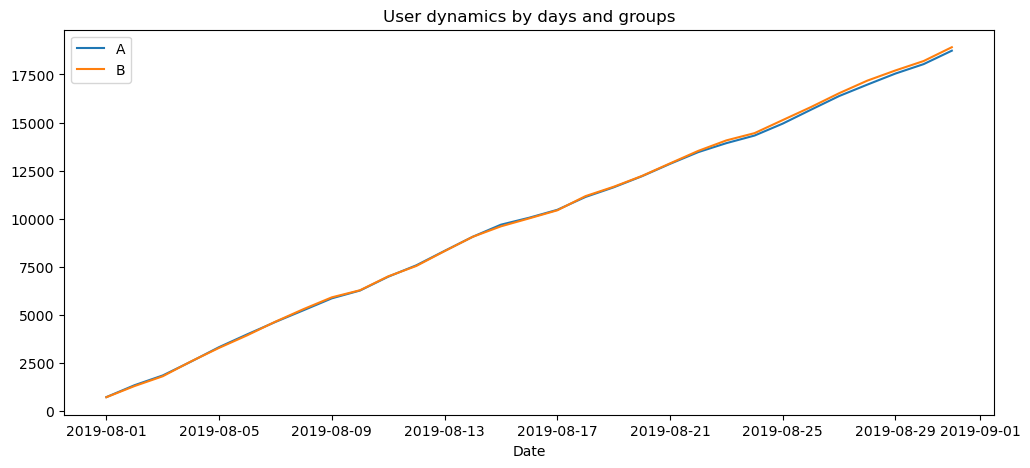

In [20]:
visitorsA = visitorsAggregated[visitorsAggregated['group']=='A'][['date','group', 'visitors']]
visitorsB = visitorsAggregated[visitorsAggregated['group']=='B'][['date','group', 'visitors']]

plt.figure(figsize=(12, 5))

# create a chart by the number of users of group A
plt.plot(visitorsA['date'], visitorsA['visitors'], label='A')
# create a chart by the number of users of group B
plt.plot(visitorsB['date'], visitorsB['visitors'], label='B')

plt.legend()
plt.xlabel('Date')
plt.title('User dynamics by days and groups')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
As a result of the first step, we performed data pre-processing:
    
    - there are no gaps in any table, and there are no negative values in the columns with revenue and the number of users;
    
    - column names have been changed to a common format;
    
    - no duplicates found in data;
    
    - all the hypotheses that we need to test separately are wrote down;
    
    - hypotheses scores from 1 to 10 on a 10-point scale, no abnormal values;
    
    - among the names of the test groups, only A and B, there are no other values, everything is in order;
    
    - the minimum and maximum dates in the `orders.csv` and `visitors.csv` dataframes are the same. The test was conducted from 1 to 31 August 2019;
    
    - 58 users were found who were in both testing groups. We removed them from the data;
    
    - also we looked at the dynamics of users by groups: there is a uniform and stable increase in the number of users in each group.
    
    
We can proceed to further analysis.

## Prioritization of hypotheses

### Using the ICE framework

Let's examine the file with hypotheses and parameter estimates `ICE`.

We will calculate `ICE` for hypotheses and add the obtained `ICE` values to the existing table.

In [21]:
pd.options.display.max_colwidth = 130

hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In the case of the `ICE` framework, high levels of influence and confidence in the degree of influence, as well as a low level of effort to be applied, are important.

The leading hypotheses are:

    1. launch a birthday promotion;

    2. add two new traffic acquisition channels to attract 30% more users;

    3. add a subscription form to all main pages to build a customer base for email newsletters.


### Using the RICE framework

Let's calculate `RICE` for hypotheses. We will add the obtained `RICE` values to the existing table. Sorting in this case will go on a new column with a score of `RICE`.

In [22]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In the case of the `RICE` framework, a high estimate of the number of users affected by the change is of additional importance.

Here the situation according to the leading hypotheses changes:

    1. add a subscription form to all main pages in order to build a customer base for email newsletters;
    
    2. add product recommendation blocks to the online store website to increase conversion and average order check;
    
    3. add two new traffic acquisition channels which will attract 30% more users;
    
    4. display banners with current promotions and sales on the main page to increase conversions.
    
    
The birthday discount hypothesis descends from position one to position five.

<div style="border:solid green 2px; padding: 20px">
    
As mentioned earlier, in the case of using the `RICE` framework, the `reach` score acquires additional significance, which is not in the calculations of the `ICE` framework.
    
Thus, the **hypothesis about adding a subscription form to all main pages** could come out on top, as it will affect all users who leave their e-mail in the specified form, which provides 100% `reach` - that is, the score 10.
    
In the same way, the **hypothesis about adding product recommendation blocks** starts to lead, which has a `reach` score of 8 points, despite the fact that it has one of the lowest `impact` scores.
    
The **Birthday Discount Hypothesis** drops out of the leaderboard because it has the lowest `reach` score of 1. In fact, it is extremely rare for users to provide additional information such as their date of birth, as this field is usually optional.
    
Based on the results of using the `RICE` framework, the third place was shared by the **hypothesis about two new channels for attracting traffic and the hypothesis about placing banners with current promotions on the main page of the site**. The last one is also in fourth place if we use the `ICE` framework.
    
This situation is due to one of the high `confidence` scores - confidence that this step will really affect the increase in conversion, as well as a score of 5 points for the `reach` indicator. Indeed, this may affect only half of the audience, but of those customers who pay attention and are interested in receiving goods on a special offer, the likelihood that they will make a bargain increases.
    

## A/B-test analysis


The A/B test completed, and we got the results that are described in the `orders.csv` and `visitors.csv` files.

Let's analyze the test results.

### Chart of cumulative revenue and average bill by groups

In [23]:
# read data from files with A/B testing results
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



To create a chart, you need to collect cumulative data.

Let's declare a `cumulativeData` dataframe with columns:

* 		`date` — date of the test;
* 		`group` — group of A/B-test (A or B);
* 		`orders` — cumulative number of orders for the specified date in the specified group;
* 		`buyers` — cumulative number of users who made at least one order on the specified date in the specified group;
* 		`revenue` — cumulative revenue as of the specified date in the specified group (average check);
* 		`visitors` — the cumulative number of visitors to the online store on the specified date in a specific group.

An array of unique pairs of date values and test groups `datesGroups`, as well as aggregated cumulative data on online store visitors `visitorsAggregated` by day, were created earlier in the data preprocessing part.



Get the rows of the `orders ` table whose date is less than or equal to the date of the element from `datesGroups `, and the test group is equal to the group from `datesGroups `:

 `orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] `

Aggregate values:

- Calculate the maximum date. 
- For the group we will also calculate the maximum, and although it will be certain, we will do this so that the `group` column does not disappear from the final output. 
- Find the number of unique order IDs and users.
- Calculate the sum of average checks.

 `.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}) `.

Apply the methods to each row of the dataframe:  `apply(axis=1)` 

and sort the results by columns  `date ` и  `group `:

In [24]:
# we get aggregated cumulative data on orders by day
ordersAggregated = (datesGroups
                    .apply(lambda x: 
                           orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                           .agg({'date' : 'max', 
                                 'group' : 'max', 
                                 'transactionId' : 'nunique', 
                                 'visitorId' : 'nunique', 
                                 'revenue' : 'sum'}), 
                           axis=1)
                    .sort_values(by=['date','group'])
                   )    

In [25]:
# combine cumulative data in one table and assign understandable names to its columns
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [26]:
# check column with date info
display(cumulativeData['date'].min())
cumulativeData['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

The dates remained the same: from August 01 to August 31, 2019. Everything is fine.

Let's create the charts of cumulative revenue by days and groups of A/B testing:

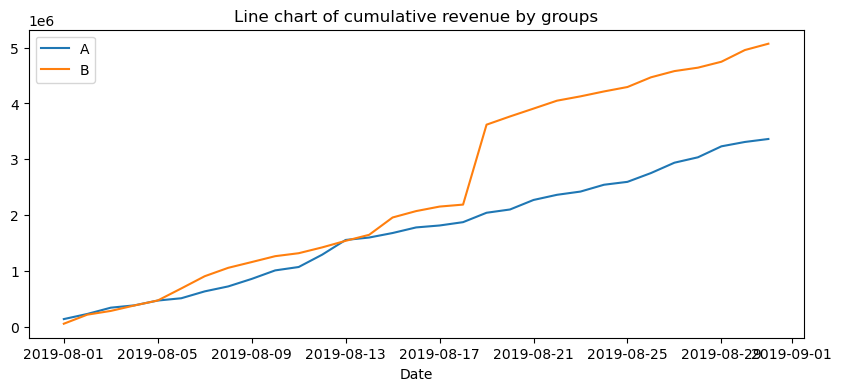

In [28]:
# dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 4))

# create a chart of the revenue of group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# create a chart of the revenue of group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Date')
plt.title('Line chart of cumulative revenue by groups')
plt.show()


According to the chart we can see revenue growth in both groups, and it is a good sign.

Their growth is approximately the same until mid-August, after which a sharp jump is observed in group B. This could be affected either by a sharp increase in the number of orders, or the appearance of very expensive orders.

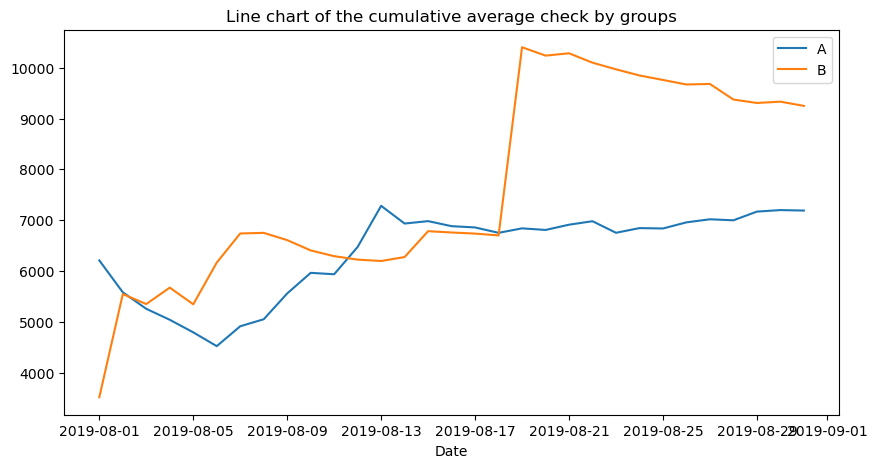

In [29]:
plt.figure(figsize=(10, 5))
# create the charts of the average check by groups
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.xlabel('Date')
plt.title('Line chart of the cumulative average check by groups')
plt.show()

The average check is by no means uniform in groups.

In group A the average bill decreases by the beginning of August, by mid-August it becomes slightly larger than group B, only after that it stabilizes and remains constant until the end of the test.

In group B the average check is growing, but in leaps and bounds, and again we see a sharp increase in the average check in mid-August, after which the level of the average check begins to gradually decrease. Orders with a large average check could have affected such a surge.

### Chart of the relative change in the cumulative average check of group B to group A

Let's create a chart of the relative difference for the average bill.

Add a horizontal axis using the `axhline()` method:

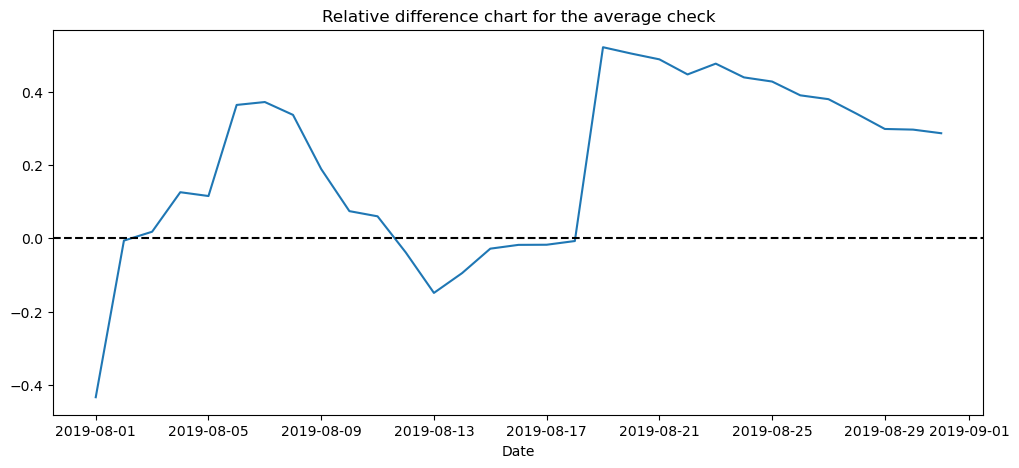

In [30]:
# collect data in one dataframe
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, 
                                  left_on='date', 
                                  right_on='date', 
                                  how='left', 
                                  suffixes=['A', 'B'])
                          )

plt.figure(figsize=(12, 5))

# create the ratio of average bills
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# add X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.title('Relative difference chart for the average check')
plt.show()

There are several points on the graph where we see either a sharp increase or a sharp decline in differences between segments.
This can be affected by large orders and outliers, which we will check next.

### Chart of the cumulative average number of orders per visitor by group

Let's create a chart of the cumulative average number of orders per visitor by groups.

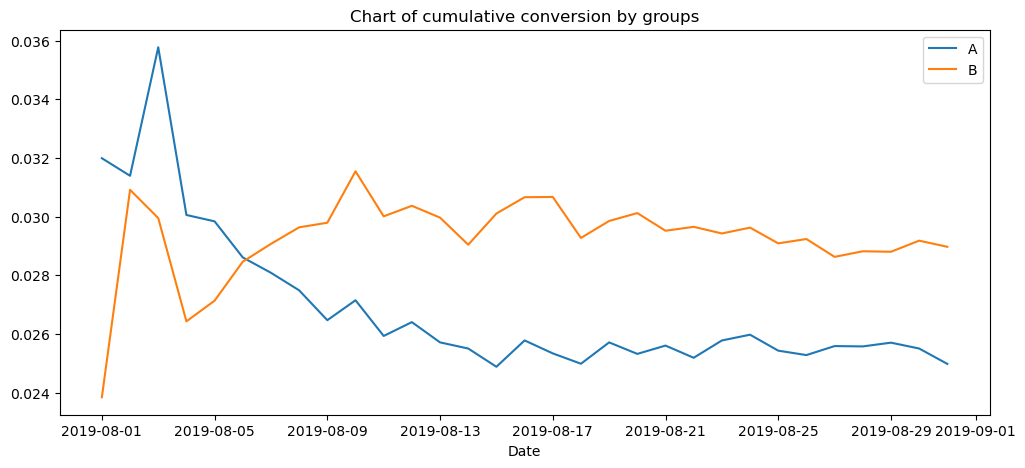

In [31]:
# calculate cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# separating data by group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# separating data by group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 5))
# create the charts
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.xlabel('Date')
plt.title('Chart of cumulative conversion by groups')
plt.show()

Group A started with a higher conversion rate than group B, but after the first week of the test, group A's conversion decreased sharply, while group B's conversion increased.

The conversions of both groups were at relatively stable levels until the end of the test.

### Chart of the relative change in the cumulative average number of orders per visitor of group B to group A

Let's create a chart of the relative difference in cumulative conversions:

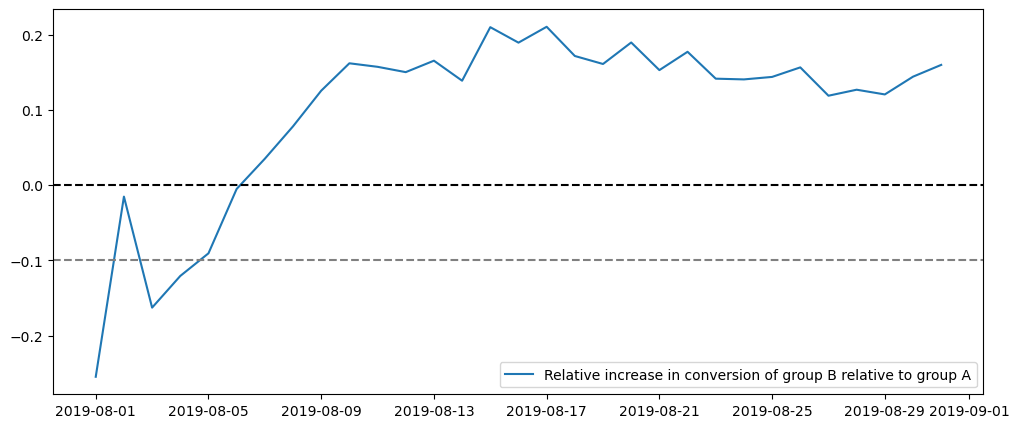

In [32]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B'])
                              )

plt.figure(figsize=(12, 5))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Relative increase in conversion of group B relative to group A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.show()


Initially the conversion of group B either rose sharply or fell sharply relative to the conversion of group A.

Literally after 5 days of the test the conversion of group B increased significantly relative to group A and remained at a high level until the end of the test.

Next, we analyze possible outliers and anomalies to get a more accurate picture.

### Scatter plot and 95th and 99th percentiles of orders by user


Let's start analyzing outliers and anomalies in order to avoid errors in the results of the A/B test.

Firstly we will examine the order data:

In [33]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A



As we can see among the majority of orders ranging from 730 to 4000, there are orders with a much larger amount - about 10,000 and over 13,000. Such orders can distort the test results.

Let's build a scatter plot of the number of orders per user:

In [34]:
# count the number of orders by users
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


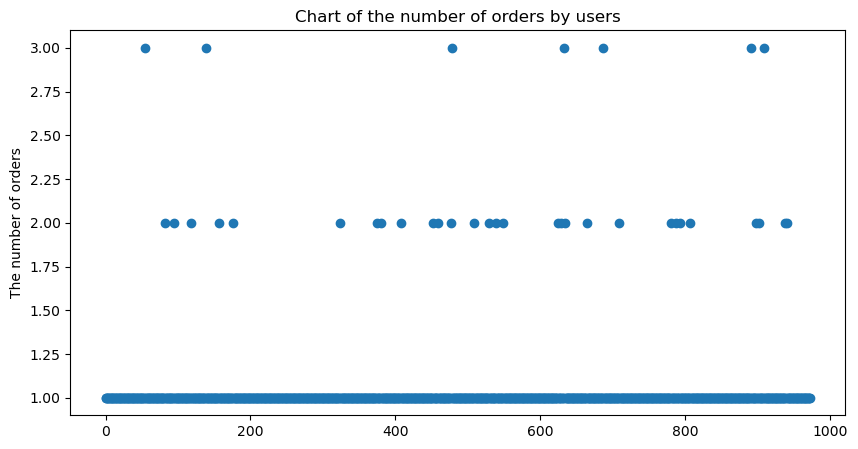

In [35]:
# create a scatter chart
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('The number of orders')
plt.title('Chart of the number of orders by users')
plt.show()

Most of the users made only 1 order, and they were slightly "diluted" by users with 2 orders. Already further there are significantly fewer customers with 3 orders.

Let's calculate the sample percentiles of the number of orders per user:

In [36]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])


Users who made no more than one purchase fell into the 90th and 95th percentiles. And only no more than 1% of customers made more than 2 purchases.

It is reasonable to choose more than 2 orders per user beyond the upper limit of the number of orders, and weed out anomalous users on it, so as not to remove a significant part of the information from the data.

### Scatter plot and 95th and 99th order value percentiles

Let's build a scatter plot of the cost of orders:

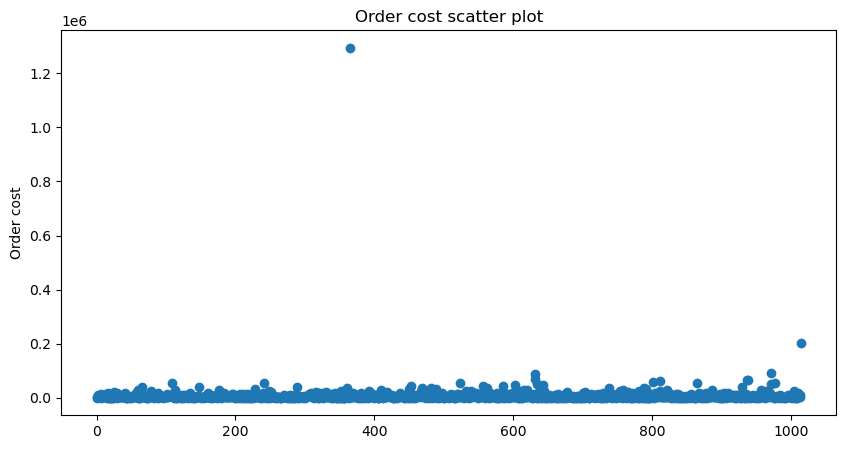

In [37]:
plt.figure(figsize=(10, 5))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.ylabel('Order cost')
plt.title('Order cost scatter plot')
plt.show()


According to the chart an order worth 1.2 million and 200 thousand is clearly knocked out. The bulk of orders falls on the level of up to 100,000 thousand and possibly even much lower.

Let's limit the data on the Y axis to look at the cost of orders in more detail:

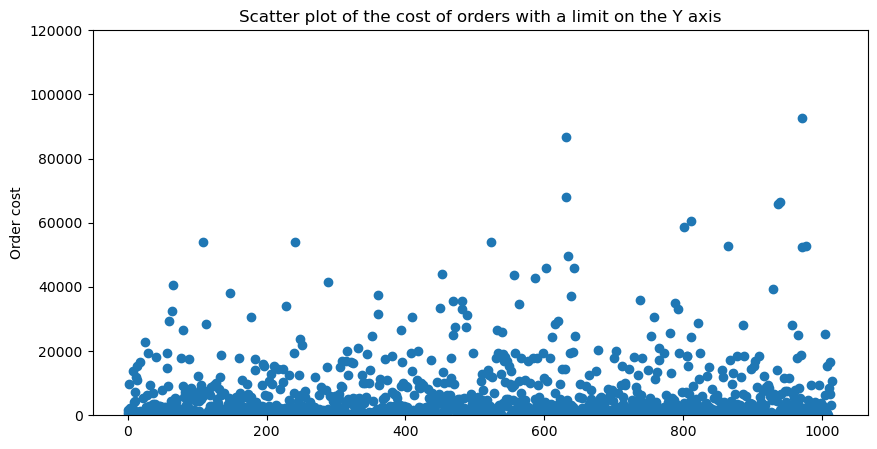

In [38]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 120000)

plt.scatter(x_values, orders['revenue'])

plt.ylabel('Order cost')
plt.title('Scatter plot of the cost of orders with a limit on the Y axis')
plt.show()

As we can see from the chart above most of the orders barely exceeded 20,000, and there are fewer and fewer orders after the 40,000 border.

Let's look at the order value percentiles:

In [39]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])


No more than 5% of orders cost more than 26 thousand. And no more than 1% of orders with a check of more than 53 thousand.

In our case, we will limit the data to the 99th percentile so as not to discard a large amount of information.

### Statistical significance of differences between groups on raw data


We will calculate the statistical significance of the differences in the average number of orders per user and the average check between groups according to "raw" data - without removing anomalous users.

**Hypotheses**:

H₀: there is no difference in the average number of orders between groups. 

H₁: there are mean differences between the groups.


In [40]:
# calculate the total number of users in group A for each date
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# create cumulative data
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [41]:
# do the same for group B users
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [42]:
# create cumulative data on orders in each group
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [43]:
# orders and total bill of group B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [44]:
# combine the received data into one table and display the first 5 rows on the screen
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280



Calculate the statistical significance of the difference in the average number of orders between groups.

We will create `ordersByUsersA` and `ordersByUsersB` variables with `visitorId` and `orders` columns. In them, for users who ordered at least 1 time, we indicate the number of completed orders:

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Let's declare the variables `sampleA` and `sampleB` in which the number of orders will correspond to users from different groups. Those who did not order anything will be matched with zeros.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [47]:
# apply the Mann-Whitney test
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# to get the average number of orders per user, divide the sum of orders by the number of users,
# then we derive the relative increase in the average number of orders of group B
print('Relative growth:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Relative growth: 0.160



**Conclusion**: According to the "raw" data there are differences in the average number of orders for groups A and B.

The first number — p-value = 0.011 is less than 0.05. This means that the null hypothesis that there are no statistically significant differences in the average number of orders between groups can be rejected and the alternative hypothesis accepted - there are differences.

By the second number we can say that group B "wins" - the relative growth of group B is 16%.


Now let's check the statistical significance of differences in the average check between segments. 

H₀: there were no differences in the average check between the groups.

H₁: there are differences in the average check between the groups.

In [48]:
# to calculate the statistical significance of differences in the average check, 
# we pass data on revenue from orders to the mannwhitneyu() criterion
print('P-value:', '{0:.3f}'
        .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                   orders[orders['group']=='B']['revenue'])[1])
       )

# and find the relative differences in the average check between groups:
print('Relative difference in average check:', '{0:.3f}'
        .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Relative difference in average check: 0.287



**Conclusion**: P-value is significantly greater than 0.05. There are no statistically significant differences in the average check between the groups.

The average check of group B is significantly higher than the average check of group A, by almost 29%, but given that the observed differences are not significant at this level of significance, this may mean that they could be obtained by chance.

Next, we proceed to analyze the "cleaned" data to look at the results of the group without outliers and anomalies.

### Statistical significance of differences between groups according to cleaned data

Previously we found the 95th and 99th percentiles of average checks, they are 26785 and 53904. And the 95th and 99th percentiles of the number of orders per user are equal to 1 and 2 orders per user.

Let's take for anomalous users those who made from 3 orders or made an order more expensive than 53,904 rubles. So we will remove no more than 5% of users with a very high average check and with the largest number of orders.

Let's make slices of users with more than 2 orders - `usersWithManyOrders` and users who have made orders more than 53,000 - `usersWithExpensiveOrders`. Let's combine them in the `abnormalUsers` table.

In [49]:
# create variables in which we will put the result of calculating the percintel
perc_rev = np.percentile(orders['revenue'], 99)
perc_ord = np.percentile(ordersByUsers['orders'], 99)

Find out how many anomalous users are using the `shape` attribute:

In [50]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > perc_ord]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > perc_ord]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > perc_rev]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())
abnormalUsers.shape[0]

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64

16

In [51]:
orders['visitorId'].nunique()

973

Thus, we identified 16 anomalous users, which is about 2% of the total number of unique users (their total number after "cleaning" of dummy users is 973).

In [52]:
# prepare samples of the number of orders by users by test groups
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [53]:
# apply the Mann-Whitney statistical test to the obtained samples
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative growth:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.007
Relative growth: 0.189


**Conclusion**: p-value is still less than 0.05, statistical significance has been achieved.

The relative growth of group B increased from 16% to almost 19%, it means segment B is better than A. 

Let's see if there have been any changes in the average check.

In [54]:
print('P-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Relative difference in average check:', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.788
Relative difference in average check: -0.032


**Conclusion**: P-value is still significantly greater than 0.05. This means that we still cannot reject the null hypothesis and cannot assume that there are differences in the average check between groups.

However, we can notice that the difference between the segments in terms of the average bill has changed significantly. Earlier group B was in the lead and was higher than group A by almost 26%, but now group B, on the contrary, “lags behind” by 3%, that is, there was a decrease of almost 31% , due to the fact that we removed anomalous users with very large checks.

## Decision making and general conclusion


We completed a business decision project and conducted an A/B test analysis in which we checked the cumulative revenue and average check by group, as well as the cumulative conversion.

Additionally the 95th and 99th percentiles of the number and cost of orders were found in order to further determine the statistical significance of the differences in the "raw" and "cleared" data from anomalies.

We know the next facts:


1. both analyzes of statistical significance for the number of orders, both in the "raw" data and in the "cleaned" data, indicate that we should accept the alternative hypothesis of differences between groups. P-value for both types of data is approximately the same;


2. similarly, both analyzes of the statistical significance of the difference in the average check do not allow us to reject the null hypothesis that there is no difference in the average check between groups. The p-value does not differ between "raw" and "cleared" data;


3. The chart of the difference in the average number of orders between groups reports that the results of group B are significantly better than group A.

4. The chart of the difference in the average check fluctuates, and also shows that the results of group B showed some sharp positive spikes, but are starting to decline.


5. The relative difference in the average check between the groups according to the "cleaned" data proves that the indicators of group B do not exceed group A, and even lower by 3%. Compared to the "raw" data, we found a negative difference between groups of 31% - so strongly influenced by abnormal users with very high checks that did not allow for an adequate assessment.

**Conclusion**: Based on the available data, we can recommend to stop the test, group B is recognized as more successful in terms of the average number of orders.